In [1]:
import scanpy as sc
adata = sc.read('../data/xenium/improved_outs/grouped_filtered_buffered_adata.h5ad')

In [2]:
adata

AnnData object with n_obs × n_vars = 111021 × 541
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
import pandas as pd
csv_data = pd.read_csv('../data/xenium/41467_2023_43458_MOESM4_ESM.csv')

In [8]:
csv_data

Genes    DCIS_1    DCIS_2  Prolif_Invasive_Tumor  Invasive_Tumor   
0    SERPINA3  2.327150  1.637294              -0.531378       -0.544919  \
1        ESR1  3.572079  1.791021               0.300844       -0.042592   
2     CEACAM6  3.621209  1.786169              -0.422193       -0.382355   
3     CEACAM8  3.330266  2.191152               0.004957        0.029682   
4        AGR3  2.219148  3.213558               0.083560       -0.248952   
..        ...       ...       ...                    ...             ...   
308     PPARG -0.338426 -0.507219               0.316962       -0.141006   
309     TCF15 -0.431056 -0.359757              -0.238780       -0.325422   
310      TCF4 -0.705485 -0.731847              -0.684185       -0.685841   
311    AKR1C1  0.298755 -0.465756              -0.794885       -0.797805   
312    AKR1C3 -0.673172 -0.595774              -0.650234       -0.715268   

     Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
0         2.075936       1.664456              -0.502572     -0.538760  \
1         0.431788      -0.202569              -0.396183     -0.562775   
2         0.341947       0.349583              -0.382157     -0.461351   
3         0.223742       0.457422              -0.379674     -0.500369   
4         0.960034      -0.119078              -0.398760     -0.508153   
..             ...            ...                    ...           ...   
308      -0.559448      -0.584905              -0.120495     -0.537300   
309      -0.330731      -0.402823               0.306865     -0.162181   
310      -0.396396      -0.716368              -0.583386     -0.497069   
311       0.059594       2.073501              -0.855245     -0.795098   
312      -0.264523       0.956717              -0.680866     -0.624022   

     CD4+_T_Cells  ...  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells   
0       -0.589960  ...                -0.502320  -0.536950 -0.521432  \
1       -0.591560  ...                -0.545251  -0.544589 -0.262311   
2       -0.501984  ...                -0.433649  -0.389543 -0.414885   
3       -0.529298  ...                -0.526940  -0.497042 -0.495499   
4       -0.529606  ...                -0.472275  -0.485073 -0.449064   
..            ...  ...                      ...        ...       ...   
308     -0.639934  ...                -0.572286  -0.500312 -0.480455   
309     -0.415775  ...                 0.046680  -0.648853 -0.310222   
310     -0.582606  ...                -0.423529   2.517738  0.249668   
311     -0.837757  ...                -0.140717   0.982352 -0.742926   
312     -0.564892  ...                -0.317868   1.740663 -0.433759   

     Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
0        -0.458220      -0.473244   -0.554848   -0.426263 -0.244188  \
1        -0.392398      -0.239356   -0.623361   -0.279893 -0.162283   
2        -0.384354      -0.346393   -0.470224   -0.313836 -0.174916   
3        -0.416960      -0.383465   -0.526286   -0.369060 -0.340507   
4        -0.429822      -0.447497   -0.517179   -0.364233 -0.298631   
..             ...            ...         ...         ...       ...   
308       0.200765       0.104691   -0.464516   -0.419073  0.760710   
309      -0.283616      -0.128917   -0.648853   -0.648853  0.190319   
310      -0.136094       0.119409   -0.297976   -0.391752  1.085481   
311      -0.328333       0.075570   -0.860275   -0.245074  2.076440   
312      -0.245218      -0.116595   -0.797343   -0.274333  1.680239   

     Perivascular-Like  Endothelial  
0            -0.556693    -0.331122  
1            -0.483418    -0.440892  
2            -0.478270    -0.377087  
3            -0.524282    -0.445508  
4            -0.514593    -0.436912  
..                 ...          ...  
308           0.824744     3.822161  
309           0.846502     3.968071  
310           0.502645     2.658135  
311          -0.297012     2.012176  
312          -0.044638     2.850796  

[313 rows x 21 columns]

In [9]:
csv_data = csv_data.drop(columns=['Unlabeled'])

In [12]:
csv_data = csv_data.rename(columns={
    'Temp_DCIS_1': 'DCIS_2'
})

In [13]:
adata_genes = adata.var_names
adata_genes

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'ZEB2', 'ZNF562', 'antisense_ADCY4', 'antisense_BCL2L15',
       'antisense_LGI3', 'antisense_MYLIP', 'antisense_PROKR2',
       'antisense_SCRIB', 'antisense_TRMU', 'antisense_ULK3'],
      dtype='object', name='feature_name', length=541)

In [14]:
# Extract gene names from AnnData and CSV
adata_genes = adata.var_names
csv_genes = csv_data['Genes']

# Ensure genes in both datasets match
common_genes = adata_genes.intersection(csv_genes)

# Subset AnnData and CSV data to include only common genes
adata = adata[:, common_genes]
csv_data = csv_data[csv_data['Genes'].isin(common_genes)]


In [15]:
adata.var.index

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)

In [16]:
csv_data['Genes']

0      SERPINA3
1          ESR1
2       CEACAM6
3       CEACAM8
4          AGR3
         ...   
308       PPARG
309       TCF15
310        TCF4
311      AKR1C1
312      AKR1C3
Name: Genes, Length: 313, dtype: object

In [17]:
csv_data

Genes    DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
0    SERPINA3  2.327150  1.637294              -0.531378       -0.544919  \
1        ESR1  3.572079  1.791021               0.300844       -0.042592   
2     CEACAM6  3.621209  1.786169              -0.422193       -0.382355   
3     CEACAM8  3.330266  2.191152               0.004957        0.029682   
4        AGR3  2.219148  3.213558               0.083560       -0.248952   
..        ...       ...       ...                    ...             ...   
308     PPARG -0.338426 -0.507219               0.316962       -0.141006   
309     TCF15 -0.431056 -0.359757              -0.238780       -0.325422   
310      TCF4 -0.705485 -0.731847              -0.684185       -0.685841   
311    AKR1C1  0.298755 -0.465756              -0.794885       -0.797805   
312    AKR1C3 -0.673172 -0.595774              -0.650234       -0.715268   

     Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
0         2.075936       1.664456              -0.502572     -0.538760  \
1         0.431788      -0.202569              -0.396183     -0.562775   
2         0.341947       0.349583              -0.382157     -0.461351   
3         0.223742       0.457422              -0.379674     -0.500369   
4         0.960034      -0.119078              -0.398760     -0.508153   
..             ...            ...                    ...           ...   
308      -0.559448      -0.584905              -0.120495     -0.537300   
309      -0.330731      -0.402823               0.306865     -0.162181   
310      -0.396396      -0.716368              -0.583386     -0.497069   
311       0.059594       2.073501              -0.855245     -0.795098   
312      -0.264523       0.956717              -0.680866     -0.624022   

     CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells   
0       -0.589960                -0.502320  -0.536950 -0.521432  \
1       -0.591560                -0.545251  -0.544589 -0.262311   
2       -0.501984                -0.433649  -0.389543 -0.414885   
3       -0.529298                -0.526940  -0.497042 -0.495499   
4       -0.529606                -0.472275  -0.485073 -0.449064   
..            ...                      ...        ...       ...   
308     -0.639934                -0.572286  -0.500312 -0.480455   
309     -0.415775                 0.046680  -0.648853 -0.310222   
310     -0.582606                -0.423529   2.517738  0.249668   
311     -0.837757                -0.140717   0.982352 -0.742926   
312     -0.564892                -0.317868   1.740663 -0.433759   

     Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
0        -0.458220      -0.473244   -0.554848   -0.426263 -0.244188  \
1        -0.392398      -0.239356   -0.623361   -0.279893 -0.162283   
2        -0.384354      -0.346393   -0.470224   -0.313836 -0.174916   
3        -0.416960      -0.383465   -0.526286   -0.369060 -0.340507   
4        -0.429822      -0.447497   -0.517179   -0.364233 -0.298631   
..             ...            ...         ...         ...       ...   
308       0.200765       0.104691   -0.464516   -0.419073  0.760710   
309      -0.283616      -0.128917   -0.648853   -0.648853  0.190319   
310      -0.136094       0.119409   -0.297976   -0.391752  1.085481   
311      -0.328333       0.075570   -0.860275   -0.245074  2.076440   
312      -0.245218      -0.116595   -0.797343   -0.274333  1.680239   

     Perivascular-Like  Endothelial  
0            -0.556693    -0.331122  
1            -0.483418    -0.440892  
2            -0.478270    -0.377087  
3            -0.524282    -0.445508  
4            -0.514593    -0.436912  
..                 ...          ...  
308           0.824744     3.822161  
309           0.846502     3.968071  
310           0.502645     2.658135  
311          -0.297012     2.012176  
312          -0.044638     2.850796  

[313 rows x 20 columns]

In [18]:
# Ensure both gene lists are in the same case
adata_genes = adata.var.index.str.upper()
csv_genes = csv_data['Genes'].str.upper()

# Create a mapping between adata genes and csv data rows
csv_data.index = csv_genes  # Set the gene names as the index for easier lookup

# Filter and reorder the csv_data to match the order of adata genes
csv_data_reordered = csv_data.loc[adata_genes].dropna()


In [19]:
csv_data_reordered

Genes    DCIS_2    DCIS_1  Prolif_Invasive_Tumor   
feature_name                                                      
ABCC11        ABCC11  1.627568  0.103818               2.462698  \
ACTA2          ACTA2 -0.147560 -0.456253              -0.286599   
ACTG2          ACTG2  0.853811 -0.101744               0.688588   
ADAM9          ADAM9  0.641999  0.996737               1.973919   
ADGRE5        ADGRE5 -1.317558 -1.461023              -1.489023   
...              ...       ...       ...                    ...   
VWF              VWF -0.308381 -0.310295              -0.242985   
WARS            WARS  0.423956 -0.096414               1.314041   
ZEB1            ZEB1 -0.924201 -0.962277              -0.767225   
ZEB2            ZEB2 -1.003718 -1.032369              -0.959725   
ZNF562        ZNF562  1.767746  1.086056               2.543459   

              Invasive_Tumor  Myoepi_ACTA2+  Myoepi_KRT15+   
feature_name                                                 
ABCC11              2.652923      -0.413890      -0.182707  \
ACTA2              -0.374978       1.571581      -0.483258   
ACTG2               0.183123       3.298948       0.150006   
ADAM9               1.070857       0.038601       2.348248   
ADGRE5             -1.474173      -0.976652      -0.554050   
...                      ...            ...            ...   
VWF                -0.257147      -0.276106      -0.322238   
WARS                0.660351       0.165117       0.349285   
ZEB1               -0.781500       0.157335      -0.981748   
ZEB2               -0.969722      -0.667617      -0.963372   
ZNF562              1.510575       0.318116       0.396352   

              T_Cell_&_Tumor_Hybrid  CD8+_T_Cells  CD4+_T_Cells   
feature_name                                                      
ABCC11                    -0.054479     -0.535060     -0.568054  \
ACTA2                     -0.433844     -0.492023     -0.546879   
ACTG2                     -0.518020     -0.761809     -1.017506   
ADAM9                     -0.512094     -1.002861     -1.126528   
ADGRE5                     0.848954      1.859226      0.431848   
...                             ...           ...           ...   
VWF                       -0.198615     -0.230621     -0.234133   
WARS                      -0.436244     -0.946291     -1.405793   
ZEB1                      -0.140023     -0.113061     -0.460319   
ZEB2                      -0.665058     -0.402531     -0.723744   
ZNF562                    -0.131575     -0.835249     -1.003954   

              Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells  Macrophages_1   
feature_name                                                                
ABCC11                      -0.519494  -0.529454 -0.511962      -0.387892  \
ACTA2                       -0.432903  -0.465872 -0.521565      -0.394747   
ACTG2                       -0.860185  -0.642513 -0.843472      -0.052951   
ADAM9                       -0.955982  -0.717369 -0.940024      -0.068820   
ADGRE5                       0.822463   0.187711  0.567568       0.284671   
...                               ...        ...       ...            ...   
VWF                         -0.248283  -0.177224 -0.243774      -0.219656   
WARS                        -1.075456  -0.946109  0.297322       1.113842   
ZEB1                        -0.137586  -0.151832 -0.118053      -0.212667   
ZEB2                        -0.600273   0.811634 -0.377567       1.054091   
ZNF562                      -0.996496  -0.797563 -0.717559      -0.095750   

              Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
feature_name                                                    
ABCC11            -0.478463   -0.555539   -0.528292 -0.302518  \
ACTA2             -0.415543   -0.463975   -0.431397  0.463068   
ACTG2             -0.619625    0.133467   -0.877556  0.046004   
ADAM9              0.414614   -0.933312   -0.837433  0.295960   
ADGRE5             0.503026   -1.030036    0.021441  0.341775   
...    

In [20]:

csv_data_reordered = csv_data_reordered.drop(columns='Genes')

In [21]:
csv_data_reordered

DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
feature_name                                                              
ABCC11        1.627568  0.103818               2.462698        2.652923  \
ACTA2        -0.147560 -0.456253              -0.286599       -0.374978   
ACTG2         0.853811 -0.101744               0.688588        0.183123   
ADAM9         0.641999  0.996737               1.973919        1.070857   
ADGRE5       -1.317558 -1.461023              -1.489023       -1.474173   
...                ...       ...                    ...             ...   
VWF          -0.308381 -0.310295              -0.242985       -0.257147   
WARS          0.423956 -0.096414               1.314041        0.660351   
ZEB1         -0.924201 -0.962277              -0.767225       -0.781500   
ZEB2         -1.003718 -1.032369              -0.959725       -0.969722   
ZNF562        1.767746  1.086056               2.543459        1.510575   

              Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid   
feature_name                                                        
ABCC11            -0.413890      -0.182707              -0.054479  \
ACTA2              1.571581      -0.483258              -0.433844   
ACTG2              3.298948       0.150006              -0.518020   
ADAM9              0.038601       2.348248              -0.512094   
ADGRE5            -0.976652      -0.554050               0.848954   
...                     ...            ...                    ...   
VWF               -0.276106      -0.322238              -0.198615   
WARS               0.165117       0.349285              -0.436244   
ZEB1               0.157335      -0.981748              -0.140023   
ZEB2              -0.667617      -0.963372              -0.665058   
ZNF562             0.318116       0.396352              -0.131575   

              CD8+_T_Cells  CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   
feature_name                                                                   
ABCC11           -0.535060     -0.568054                -0.519494  -0.529454  \
ACTA2            -0.492023     -0.546879                -0.432903  -0.465872   
ACTG2            -0.761809     -1.017506                -0.860185  -0.642513   
ADAM9            -1.002861     -1.126528                -0.955982  -0.717369   
ADGRE5            1.859226      0.431848                 0.822463   0.187711   
...                    ...           ...                      ...        ...   
VWF              -0.230621     -0.234133                -0.248283  -0.177224   
WARS             -0.946291     -1.405793                -1.075456  -0.946109   
ZEB1             -0.113061     -0.460319                -0.137586  -0.151832   
ZEB2             -0.402531     -0.723744                -0.600273   0.811634   
ZNF562           -0.835249     -1.003954                -0.996496  -0.797563   

               B_Cells  Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   
feature_name                                                                   
ABCC11       -0.511962      -0.387892      -0.478463   -0.555539   -0.528292  \
ACTA2        -0.521565      -0.394747      -0.415543   -0.463975   -0.431397   
ACTG2        -0.843472      -0.052951      -0.619625    0.133467   -0.877556   
ADAM9        -0.940024      -0.068820       0.414614   -0.933312   -0.837433   
ADGRE5        0.567568       0.284671       0.503026   -1.030036    0.021441   
...                ...            ...            ...         ...         ...   
VWF          -0.243774      -0.219656      -0.175439   -0.217009   -0.172035   
WARS          0.297322       1.113842      -0.906031    1.670549   -1.236518   
ZEB1         -0.118053      -0.212667      -0.365105    0.257218   -0.229417   
ZEB2         -0.377567       1.054091       1.916145    0.154043    0.750942   
ZNF562       -0.717559      -0.095750      -0.036500   -0.767085   -0.661538   

               Stromal  Perivascular-Like  Endothelial  
fea

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert AnnData matrix to dense format (if it's sparse)
adata_matrix = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

# Convert CSV data to NumPy array
csv_matrix = csv_data_reordered.values
csv_matrix = csv_matrix.T

# Initialize a dictionary to store similarities
similarity_results = {}

# Compute cosine similarity for each cell in adata with each cell in CSV data
for i, adata_row in enumerate(adata_matrix):
    similarities = cosine_similarity([adata_row], csv_matrix)
    similarity_results[adata.obs.index[i]] = similarities.flatten()

similarity_results

{'ID_100043': array([ 0.39346245,  0.3312379 ,  0.38882797,  0.37201212,  0.36473513,
         0.19133328, -0.11037924, -0.24889632, -0.40233234, -0.37602095,
        -0.19451502, -0.13186823, -0.14024316, -0.16033192, -0.24157863,
        -0.2500419 ,  0.05648988, -0.09668553, -0.02372178]),
 'ID_100044': array([ 0.57112482,  0.48529171,  0.52729835,  0.45422056,  0.20904827,
         0.19815618, -0.05631151, -0.2422551 , -0.40185609, -0.40440885,
        -0.25007323, -0.16475575, -0.16015336, -0.2064851 , -0.2829372 ,
        -0.26486068, -0.02459262, -0.2175984 , -0.07575844]),
 'ID_100045': array([ 0.50567739,  0.46910366,  0.50383334,  0.45689694,  0.19328197,
         0.20012698, -0.05317381, -0.2377237 , -0.39249346, -0.38972703,
        -0.22788876, -0.13785626, -0.15665847, -0.19511254, -0.2769041 ,
        -0.23771543, -0.01608665, -0.23112462, -0.06488683]),
 'ID_100046': array([ 0.47385153,  0.45725704,  0.51033319,  0.44855269,  0.20918519,
         0.1748489 , -0.07392707

In [23]:
# Extract column names from CSV data
column_names = csv_data_reordered.columns.tolist()


In [24]:
similarity_df = pd.DataFrame(similarity_results).T  # Transpose to have cell IDs as rows

# Set column names
similarity_df.columns = column_names

# Display the resulting DataFrame
print(similarity_df)

             DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100043  0.393462  0.331238               0.388828        0.372012  \
ID_100044  0.571125  0.485292               0.527298        0.454221   
ID_100045  0.505677  0.469104               0.503833        0.456897   
ID_100046  0.473852  0.457257               0.510333        0.448553   
ID_100047  0.500230  0.435282               0.480380        0.421698   
...             ...       ...                    ...             ...   
ID_99771   0.535262  0.355872               0.424557        0.415164   
ID_99772   0.314743  0.238075               0.254141        0.221366   
ID_99780   0.327366  0.308807               0.252707        0.247844   
ID_99781   0.497141  0.371105               0.396497        0.361179   
ID_99782   0.482453  0.334666               0.451481        0.404948   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100043       0.364735       0.191333              -0

In [25]:
similarity_df['CellType'] = similarity_df.idxmax(axis=1)

# Display the DataFrame with the new 'CellType' column
print(similarity_df[['CellType']])

                        CellType
ID_100043                 DCIS_2
ID_100044                 DCIS_2
ID_100045                 DCIS_2
ID_100046  Prolif_Invasive_Tumor
ID_100047                 DCIS_2
...                          ...
ID_99771                  DCIS_2
ID_99772           Myoepi_ACTA2+
ID_99780           Myoepi_ACTA2+
ID_99781                  DCIS_2
ID_99782                  DCIS_2

[111021 rows x 1 columns]


In [26]:
similarity_df

DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100043  0.393462  0.331238               0.388828        0.372012  \
ID_100044  0.571125  0.485292               0.527298        0.454221   
ID_100045  0.505677  0.469104               0.503833        0.456897   
ID_100046  0.473852  0.457257               0.510333        0.448553   
ID_100047  0.500230  0.435282               0.480380        0.421698   
...             ...       ...                    ...             ...   
ID_99771   0.535262  0.355872               0.424557        0.415164   
ID_99772   0.314743  0.238075               0.254141        0.221366   
ID_99780   0.327366  0.308807               0.252707        0.247844   
ID_99781   0.497141  0.371105               0.396497        0.361179   
ID_99782   0.482453  0.334666               0.451481        0.404948   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100043       0.364735       0.191333              -0.110379     -0.248896  \
ID_100044       0.209048       0.198156              -0.056312     -0.242255   
ID_100045       0.193282       0.200127              -0.053174     -0.237724   
ID_100046       0.209185       0.174849              -0.073927     -0.250105   
ID_100047       0.386465       0.261510              -0.131061     -0.283430   
...                  ...            ...                    ...           ...   
ID_99771        0.144142       0.109680              -0.065755     -0.226953   
ID_99772        0.382680       0.197094              -0.121250     -0.180656   
ID_99780        0.434059       0.191266              -0.122941     -0.200424   
ID_99781        0.196989       0.162419              -0.099554     -0.238358   
ID_99782        0.163262       0.271728              -0.106946     -0.284172   

           CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  IRF7+_DCs   B_Cells   
ID_100043     -0.402332                -0.376021  -0.194515 -0.131868  \
ID_100044     -0.401856                -0.404409  -0.250073 -0.164756   
ID_100045     -0.392493                -0.389727  -0.227889 -0.137856   
ID_100046     -0.386182                -0.399557  -0.213878 -0.148609   
ID_100047     -0.439584                -0.445784  -0.227326 -0.165717   
...                 ...                      ...        ...       ...   
ID_99771      -0.356065                -0.358675  -0.150689 -0.096473   
ID_99772      -0.267810                -0.256123  -0.156371 -0.150198   
ID_99780      -0.324385                -0.310195  -0.186776 -0.156128   
ID_99781      -0.365967                -0.379989  -0.151017 -0.136768   
ID_99782      -0.438063                -0.456015  -0.189658 -0.153979   

           Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
ID_100043      -0.140243      -0.160332   -0.241579   -0.250042  0.056490  \
ID_100044      -0.160153      -0.206485   -0.282937   -0.264861 -0.024593   
ID_100045      -0.156658      -0.195113   -0.276904   -0.237715 -0.016087   
ID_100046      -0.121111      -0.170634   -0.227520   -0.248471 -0.044416   
ID_100047      -0.157474      -0.194924   -0.278460   -0.265888 -0.012869   
...                  ...            ...         ...         ...       ...   
ID_99771       -0.141484      -0.191764   -0.213666   -0.222810 -0.025573   
ID_99772       -0.120062      -0.118606   -0.185464   -0.172848  0.021250   
ID_99780       -0.096025      -0.120966   -0.153513   -0.199086 -0.013543   
ID_99781       -0.055966      -0.101963   -0.210642   -0.214789 -0.027966   
ID_99782        0.005860      -0.021623   -0.269833   -0.229512 -0.018869   

           Perivascular-Like  Endothelial               CellType  
ID_100043          -0.096686    -0.023722                 DCIS_2  
ID_100044          -0.217598    -0.075758                 DCIS_2  
ID_100045          -0.231125    -0.064887                 DCIS_2  
ID_100046          -0.208218    -0.063307  Prolif_Invasive_Tumor  
ID_100047          -0.151962    -0.049674         

In [27]:
numeric_df = similarity_df.drop(columns=['CellType'])

# Find the maximum value per row
similarity_df['similarity'] = numeric_df.max(axis=1)

In [28]:
similarity_df

DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100043  0.393462  0.331238               0.388828        0.372012  \
ID_100044  0.571125  0.485292               0.527298        0.454221   
ID_100045  0.505677  0.469104               0.503833        0.456897   
ID_100046  0.473852  0.457257               0.510333        0.448553   
ID_100047  0.500230  0.435282               0.480380        0.421698   
...             ...       ...                    ...             ...   
ID_99771   0.535262  0.355872               0.424557        0.415164   
ID_99772   0.314743  0.238075               0.254141        0.221366   
ID_99780   0.327366  0.308807               0.252707        0.247844   
ID_99781   0.497141  0.371105               0.396497        0.361179   
ID_99782   0.482453  0.334666               0.451481        0.404948   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100043       0.364735       0.191333              -0.110379     -0.248896  \
ID_100044       0.209048       0.198156              -0.056312     -0.242255   
ID_100045       0.193282       0.200127              -0.053174     -0.237724   
ID_100046       0.209185       0.174849              -0.073927     -0.250105   
ID_100047       0.386465       0.261510              -0.131061     -0.283430   
...                  ...            ...                    ...           ...   
ID_99771        0.144142       0.109680              -0.065755     -0.226953   
ID_99772        0.382680       0.197094              -0.121250     -0.180656   
ID_99780        0.434059       0.191266              -0.122941     -0.200424   
ID_99781        0.196989       0.162419              -0.099554     -0.238358   
ID_99782        0.163262       0.271728              -0.106946     -0.284172   

           CD4+_T_Cells  Stromal_&_T_Cell_Hybrid  ...   B_Cells   
ID_100043     -0.402332                -0.376021  ... -0.131868  \
ID_100044     -0.401856                -0.404409  ... -0.164756   
ID_100045     -0.392493                -0.389727  ... -0.137856   
ID_100046     -0.386182                -0.399557  ... -0.148609   
ID_100047     -0.439584                -0.445784  ... -0.165717   
...                 ...                      ...  ...       ...   
ID_99771      -0.356065                -0.358675  ... -0.096473   
ID_99772      -0.267810                -0.256123  ... -0.150198   
ID_99780      -0.324385                -0.310195  ... -0.156128   
ID_99781      -0.365967                -0.379989  ... -0.136768   
ID_99782      -0.438063                -0.456015  ... -0.153979   

           Macrophages_1  Macrophages_2  LAMP3+_DCs  Mast_Cells   Stromal   
ID_100043      -0.140243      -0.160332   -0.241579   -0.250042  0.056490  \
ID_100044      -0.160153      -0.206485   -0.282937   -0.264861 -0.024593   
ID_100045      -0.156658      -0.195113   -0.276904   -0.237715 -0.016087   
ID_100046      -0.121111      -0.170634   -0.227520   -0.248471 -0.044416   
ID_100047      -0.157474      -0.194924   -0.278460   -0.265888 -0.012869   
...                  ...            ...         ...         ...       ...   
ID_99771       -0.141484      -0.191764   -0.213666   -0.222810 -0.025573   
ID_99772       -0.120062      -0.118606   -0.185464   -0.172848  0.021250   
ID_99780       -0.096025      -0.120966   -0.153513   -0.199086 -0.013543   
ID_99781       -0.055966      -0.101963   -0.210642   -0.214789 -0.027966   
ID_99782        0.005860      -0.021623   -0.269833   -0.229512 -0.018869   

           Perivascular-Like  Endothelial               CellType similarity  
ID_100043          -0.096686    -0.023722                 DCIS_2   0.393462  
ID_100044          -0.217598    -0.075758                 DCIS_2   0.571125  
ID_100045          -0.231125    -0.064887                 DCIS_2   0.505677  
ID_100046          -0.208218    -0.063307  Prolif_Invasive_Tumor   0.510333  
ID_100047          -0.151962    -0.049674                 DCIS_2   

In [29]:
import pandas as pd

# Assuming similarity_df is already defined

# Drop the 'CellType' column and retain only numerical data
similarity_data = similarity_df.drop(columns=['CellType'])

In [30]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
2024-08-30 15:55:21.372224: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
celltype_df = similarity_df[['CellType']].copy()

In [32]:
adata2_indices = adata.obs.index
celltype_df_indices = celltype_df.index

print(adata2_indices.equals(celltype_df_indices))

True


In [33]:
adata.obs['CellType'] = celltype_df['CellType']

In [34]:
adata.obs['similarity'] = similarity_df['similarity']

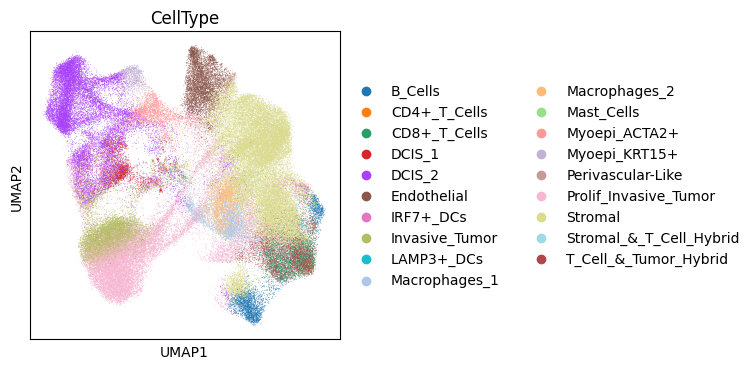

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=[ "CellType"], wspace=0.4)

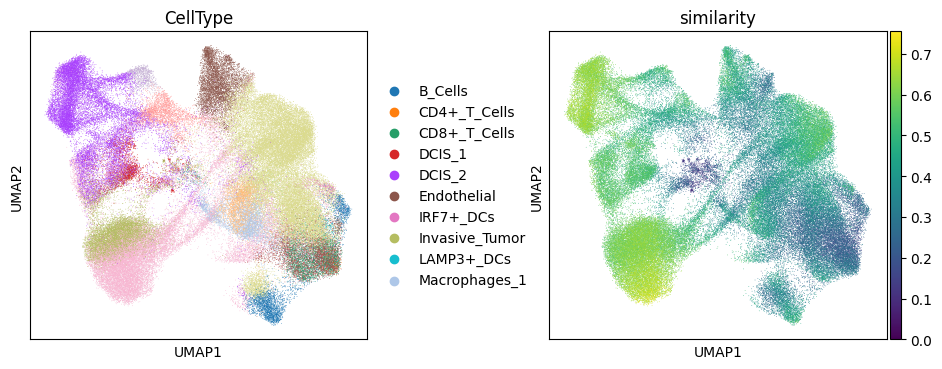

In [36]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "similarity"], wspace=0.4)

In [37]:
annotation_csv = pd.read_csv('../data/xenium/outs/insitu_replicate_1_annotation.csv')
annotation_csv

Barcode         Cluster
0             1          DCIS_1
1             2          DCIS_1
2             3       Unlabeled
3             4  Invasive_Tumor
4             5          DCIS_1
...         ...             ...
167775   167776          DCIS_2
167776   167777          DCIS_1
167777   167778          DCIS_2
167778   167779          DCIS_1
167779   167780          DCIS_2

[167780 rows x 2 columns]

In [38]:
annotation_csv[annotation_csv['Barcode']==134602]

Barcode  Cluster
134601   134602  Stromal

In [39]:
annotation_unlabeled = annotation_csv[annotation_csv['Cluster'] == 'Unlabeled']['Barcode'].values
annotation_unlabeled

array([     3,      6,      7, ..., 167622, 167623, 167772])

In [41]:
import geopandas as gpd
joined = gpd.read_file('../data/xenium/outs/final_adatas/filtered_gdf_buffered.geojson')

In [42]:
joined

id   cell_id                                           geometry
0       ID_100043   27939.0  POLYGON ((6361.13792 14815.82202, 6322.92769 1...
1       ID_100044    1548.0  POLYGON ((6329.67432 14757.71715, 6340.75168 1...
2       ID_100045    1549.0  POLYGON ((6350.22367 14733.77853, 6376.25900 1...
3       ID_100046    1546.0  POLYGON ((6328.34451 14754.72598, 6347.23576 1...
4       ID_100047    1545.0  POLYGON ((6327.25474 14759.64949, 6311.41162 1...
...           ...       ...                                                ...
111016   ID_99771   13615.0  POLYGON ((25545.31642 6804.36813, 25531.22823 ...
111017   ID_99772   13613.0  POLYGON ((25537.67106 6791.30478, 25533.18900 ...
111018   ID_99780   13625.0  POLYGON ((25612.90702 6855.81978, 25626.14914 ...
111019   ID_99781   13623.0  POLYGON ((25624.55023 6872.89285, 25612.72454 ...
111020   ID_99782  165880.0  POLYGON ((25637.95866 6873.50854, 25627.25481 ...

[111021 rows x 3 columns]

In [43]:
adata.obs.reset_index(drop=True, inplace=True)

In [44]:
adata.obs['id'] = adata.obs['id'].values

In [45]:
# Ensure IDs are of the same type
joined['id'] = joined['id'].astype(str)
adata.obs['id'] = adata.obs['id'].astype(str)

# Filter joined to only include rows with ids present in adata.obs['id']
filtered_joined = joined[joined['id'].isin(adata.obs['id'])]

# Drop duplicates based on the 'id' column

# Check the resulting DataFrame
print(filtered_joined)


               id   cell_id                                           geometry
0       ID_100043   27939.0  POLYGON ((6361.13792 14815.82202, 6322.92769 1...
1       ID_100044    1548.0  POLYGON ((6329.67432 14757.71715, 6340.75168 1...
2       ID_100045    1549.0  POLYGON ((6350.22367 14733.77853, 6376.25900 1...
3       ID_100046    1546.0  POLYGON ((6328.34451 14754.72598, 6347.23576 1...
4       ID_100047    1545.0  POLYGON ((6327.25474 14759.64949, 6311.41162 1...
...           ...       ...                                                ...
111016   ID_99771   13615.0  POLYGON ((25545.31642 6804.36813, 25531.22823 ...
111017   ID_99772   13613.0  POLYGON ((25537.67106 6791.30478, 25533.18900 ...
111018   ID_99780   13625.0  POLYGON ((25612.90702 6855.81978, 25626.14914 ...
111019   ID_99781   13623.0  POLYGON ((25624.55023 6872.89285, 25612.72454 ...
111020   ID_99782  165880.0  POLYGON ((25637.95866 6873.50854, 25627.25481 ...

[111021 rows x 3 columns]


In [46]:
filtered_joined

id   cell_id                                           geometry
0       ID_100043   27939.0  POLYGON ((6361.13792 14815.82202, 6322.92769 1...
1       ID_100044    1548.0  POLYGON ((6329.67432 14757.71715, 6340.75168 1...
2       ID_100045    1549.0  POLYGON ((6350.22367 14733.77853, 6376.25900 1...
3       ID_100046    1546.0  POLYGON ((6328.34451 14754.72598, 6347.23576 1...
4       ID_100047    1545.0  POLYGON ((6327.25474 14759.64949, 6311.41162 1...
...           ...       ...                                                ...
111016   ID_99771   13615.0  POLYGON ((25545.31642 6804.36813, 25531.22823 ...
111017   ID_99772   13613.0  POLYGON ((25537.67106 6791.30478, 25533.18900 ...
111018   ID_99780   13625.0  POLYGON ((25612.90702 6855.81978, 25626.14914 ...
111019   ID_99781   13623.0  POLYGON ((25624.55023 6872.89285, 25612.72454 ...
111020   ID_99782  165880.0  POLYGON ((25637.95866 6873.50854, 25627.25481 ...

[111021 rows x 3 columns]

In [47]:
adata.obs = adata.obs.merge(filtered_joined[['id', 'cell_id']], on='id', how='left')

# Now adata.obs has a new 'cell_id' column
print(adata.obs.head())

          id  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
0  ID_100043                 84                 4.442651         252.0  \
1  ID_100044                 72                 4.290459         236.0   
2  ID_100045                 68                 4.234107         228.0   
3  ID_100046                 62                 4.143135         173.0   
4  ID_100047                 91                 4.521789         310.0   

   log1p_total_counts  pct_counts_in_top_50_genes   
0            5.533389                   86.507937  \
1            5.468060                   90.677966   
2            5.433722                   92.105263   
3            5.159055                   93.063584   
4            5.739793                   85.806452   

   pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
0                        100.0                        100.0  \
1                        100.0                        100.0   
2                        100.0                 

In [48]:
annotation_csv[annotation_csv['Barcode']==4]

Barcode         Cluster
3        4  Invasive_Tumor

In [49]:
annotation_csv

Barcode         Cluster
0             1          DCIS_1
1             2          DCIS_1
2             3       Unlabeled
3             4  Invasive_Tumor
4             5          DCIS_1
...         ...             ...
167775   167776          DCIS_2
167776   167777          DCIS_1
167777   167778          DCIS_2
167778   167779          DCIS_1
167779   167780          DCIS_2

[167780 rows x 2 columns]

In [50]:
adata

AnnData object with n_obs × n_vars = 111021 × 313
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'CellType', 'similarity', 'cell_id'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'CellType_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [51]:
annotation_csv['Barcode'] = annotation_csv['Barcode'].astype(float)

In [52]:
annotation_csv['Barcode']

0              1.0
1              2.0
2              3.0
3              4.0
4              5.0
            ...   
167775    167776.0
167776    167777.0
167777    167778.0
167778    167779.0
167779    167780.0
Name: Barcode, Length: 167780, dtype: float64

In [53]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(float)

In [54]:
# Perform the merge
merged_df = adata.obs.merge(annotation_csv, left_on='cell_id', right_on='Barcode', how='left')


In [55]:
adata.obs['realCellType'] = merged_df['Cluster']

In [56]:
adata.obs[adata.obs['cell_id']=='4']

Empty DataFrame
Columns: [id, n_genes_by_counts, log1p_n_genes_by_counts, total_counts, log1p_total_counts, pct_counts_in_top_50_genes, pct_counts_in_top_100_genes, pct_counts_in_top_200_genes, pct_counts_in_top_500_genes, clusters, CellType, similarity, cell_id, realCellType]
Index: []

In [57]:
# Filter out rows in adata where 'cell_id' is in the unlabeled_cell_ids list
adata = adata[~adata.obs['cell_id'].isin(annotation_unlabeled)]

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


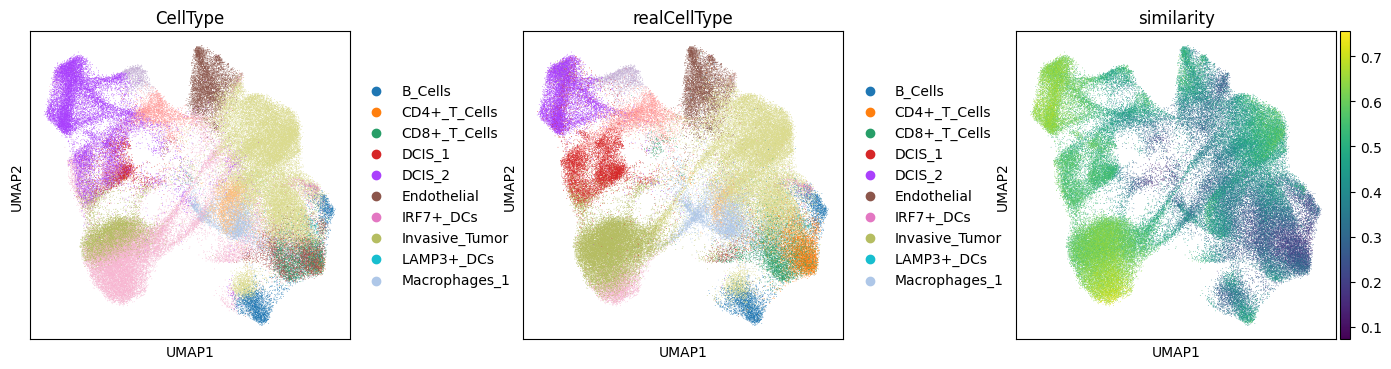

In [58]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "realCellType", 'similarity'], wspace=0.4)

In [59]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(adata.obs['CellType'], adata.obs['realCellType'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5225422601149716


In [60]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(str)
filtered_joined['cell_id'] = filtered_joined['cell_id'].astype(str)

In [61]:
filtered_joined_with_types = filtered_joined.merge(
    adata.obs[['cell_id', 'CellType', 'realCellType']],
    on='cell_id',
    how='left'
)

# Check the resulting GeoDataFrame
print(filtered_joined_with_types)

               id   cell_id   
0       ID_100043   27939.0  \
1       ID_100044    1548.0   
2       ID_100045    1549.0   
3       ID_100046    1546.0   
4       ID_100047    1545.0   
...           ...       ...   
111016   ID_99771   13615.0   
111017   ID_99772   13613.0   
111018   ID_99780   13625.0   
111019   ID_99781   13623.0   
111020   ID_99782  165880.0   

                                                 geometry   
0       POLYGON ((6361.13792 14815.82202, 6322.92769 1...  \
1       POLYGON ((6329.67432 14757.71715, 6340.75168 1...   
2       POLYGON ((6350.22367 14733.77853, 6376.25900 1...   
3       POLYGON ((6328.34451 14754.72598, 6347.23576 1...   
4       POLYGON ((6327.25474 14759.64949, 6311.41162 1...   
...                                                   ...   
111016  POLYGON ((25545.31642 6804.36813, 25531.22823 ...   
111017  POLYGON ((25537.67106 6791.30478, 25533.18900 ...   
111018  POLYGON ((25612.90702 6855.81978, 25626.14914 ...   
111019  POLYGON (

In [62]:
filtered_joined_with_types.crs = None


In [63]:
filtered_joined_with_types = filtered_joined_with_types[
    ~((filtered_joined_with_types['CellType'] == 'nan') | 
      (filtered_joined_with_types['realCellType'] == 'nan'))
]

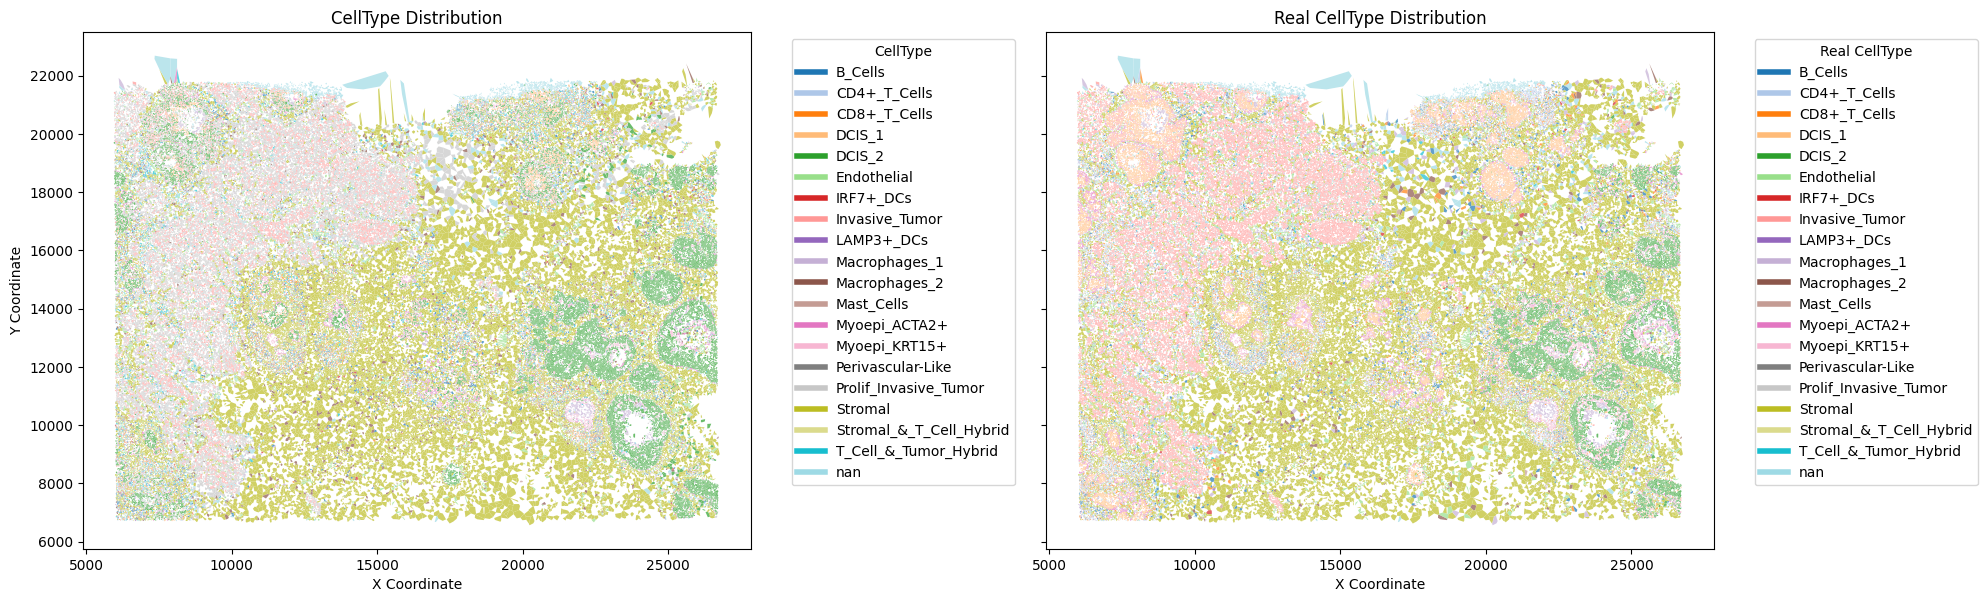

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_joined_with_types['CellType'].unique()
real_cell_type_categories = filtered_joined_with_types['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# Plot by 'CellType'
filtered_joined_with_types.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_joined_with_types['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].legend(handles=handles, labels=all_categories, title='CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot by 'realCellType'
filtered_joined_with_types.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_joined_with_types['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].legend(handles=handles, labels=all_categories, title='Real CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [65]:
filtered_gdf = filtered_joined_with_types

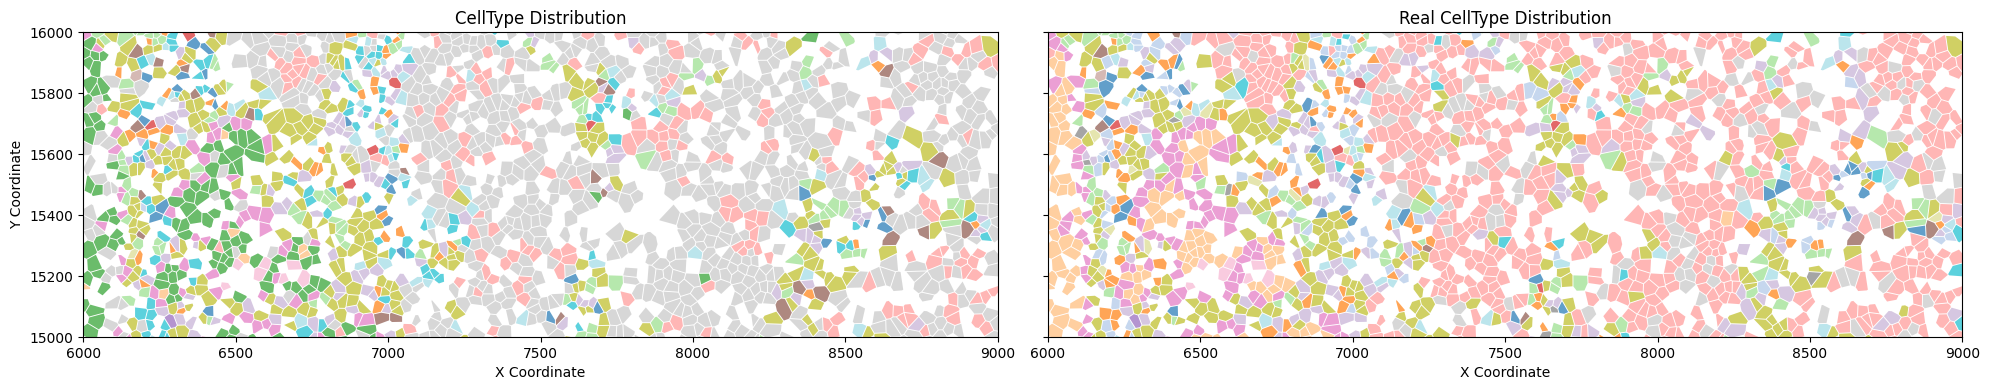

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_gdf['CellType'] = filtered_gdf['CellType'].astype(str)
filtered_gdf['realCellType'] = filtered_gdf['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_gdf['CellType'].unique()
real_cell_type_categories = filtered_gdf['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# Define your zoom area (bounding box coordinates)
xmin, xmax, ymin, ymax = 6000, 9000, 15000, 16000  # Adjust these values as needed

# Plot by 'CellType'
filtered_gdf.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_gdf['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[0].set_ylim(ymin, ymax)  # Set y-axis limits for zoom

# Plot by 'realCellType'
filtered_gdf.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_gdf['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[1].set_ylim(ymin, ymax)  # Set y-axis limits for zoom
# Adjust layout and display
plt.tight_layout()
plt.show()


In [67]:
adata.write("../data/xenium/outs/final_adatas/adata_voronoi_buffered_stats.h5ad")